<a href="https://colab.research.google.com/github/tlysenko/CreditScoring/blob/master/Finding%20Hidden%20Messages%20in%20DNA%20(Bioinformatics%20I)/Bioinformatics_1_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [48]:
import pandas as pd
import numpy as np
from google.colab import files
import itertools

import urllib.request

import time

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## 1.3 Give all values of Skew_i (GAGCCACCGCGATA) for i ranging from 0 to 14.



In [151]:
def CalculateSkew(genome):
  r = len(genome) + 1
  d = {'A':0, 'C':-1, 'G':1, 'T':0}
  skew = [0] * r 
  for i in range(1, r):
    skew[i] = skew[i-1] + d[genome[i-1]]
  skew = np.array(skew)
  return skew
def PlotSkew(skew):
  plt.figure(figsize=(10,5))
  ax = sns.lineplot(x=range(len(skew)),y=skew);
  ax.set(xlabel='position', ylabel='Skew (C-G)', title='Skew diagram')
  plt.show()
  return 

In [149]:
genome = 'CATGGGCATCGGCCATACGCC'
skew = CalculateSkew(genome)
skew

array([ 0, -1, -1, -1,  0,  1,  2,  1,  1,  1,  0,  1,  2,  1,  0,  0,  0,
        0, -1,  0, -1, -2])

In [120]:
len(skew), len(genome)

(22, 21)

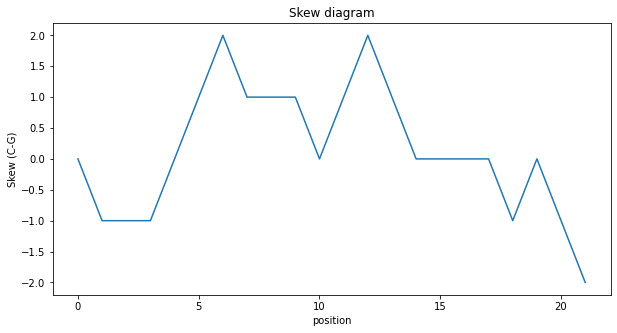

In [152]:
PlotSkew(skew)

## 1.3 Code Challenge: Solve the Minimum Skew Problem.

Input: A DNA string Genome.

Output: All integer(s) i minimizing Skewi (Genome) among all values of i (from 0 to |Genome|).


#### Example 1

In [153]:
genome = 'TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT'
len(genome)

60

In [122]:
def SkewMin(skew):
  return np.where(skew == skew.min())

In [154]:
s = CalculateSkew(genome)

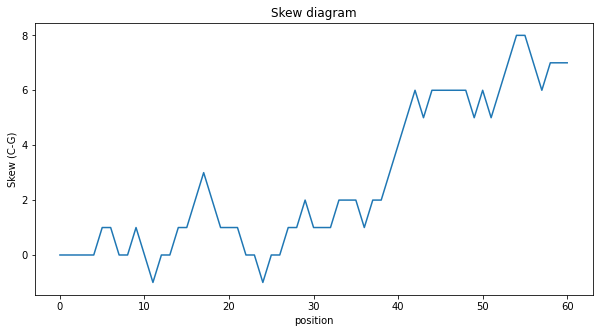

In [155]:
PlotSkew(s)

In [123]:
SkewMin(s)

(array([11, 24]),)

#### Example 2

In [126]:
url = 'http://bioinformaticsalgorithms.com/data/extradatasets/replication/minimum_skew.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('ascii')

In [128]:
genome=data.split('\r')[1].split('\n')[1]

In [129]:
answers=data.split('\r')[3].split('\n')[1:]
answers 

['89969 89970 89971 90345 90346']

In [131]:
s = CalculateSkew(genome)
SkewMin(s)

(array([89969, 89970, 89971, 90345, 90346]),)

### Example 3

In [145]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset_7_6-2.txt to dataset_7_6-2.txt
User uploaded file "dataset_7_6-2.txt" with length 92888 bytes


In [146]:
with open(fn) as f:
  genome = f.readline().split('\n')[0]
len(genome)

92887

In [39]:
genome[-20:]

'GCACCGAAGAATGGCATATA'

In [147]:
s = CalculateSkew(genome)
a = SkewMin(s)

In [148]:
#Stepik submission string
st=''
for i, el in enumerate(a[0]):
  st = st + str(el) + ' '
st

'90506 90507 '

## 1.3 E-coli Skew diagram

In [156]:
url = 'http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt'
response = urllib.request.urlopen(url)
genome = response.read().decode('ascii')

len(genome)

4639675

In [158]:
def CalculateSkewStep(genome, step):
  r = len(genome) + 1
  skew = [0]
  for i in range(0,r,step):     
    subs = genome[0:i+step]    
    skew.append(Counter(subs)['G'] - Counter(subs)['C'])
  return skew

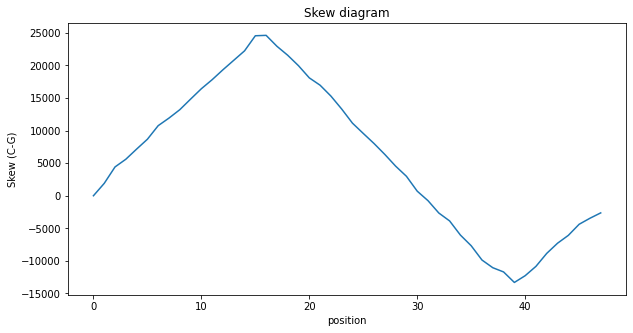

In [166]:
skew = CalculateSkewStep(genome, 100000)
PlotSkew(skew)

In [167]:
skew = CalculateSkew(genome)
SkewMin(skew)

(array([3923620, 3923621, 3923622, 3923623]),)